In [14]:
import pandas as pd

resultados_exames = pd.read_csv("data/exames.csv")
resultados_exames.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [15]:
resultados_exames.dropna(inplace = True)

In [16]:
from sklearn.model_selection import train_test_split
from numpy import random

SEED = 123143
random.seed(SEED)

valores_exames = resultados_exames.drop(columns=['id', 'diagnostico'])
diagnostico = resultados_exames.diagnostico

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames, diagnostico)

In [17]:
treino_x.head()

,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
15,14.54,27.54,96.73,103.78,658.8,0.11390,0.15950,0.163900,0.07364,0.2303,...,124.10,943.2,0.1678,0.65770,0.70260,0.786,0.17120,0.4218,0.13410,0.361295
466,13.14,20.74,85.98,103.78,536.9,0.08675,0.10890,0.108500,0.03510,0.1562,...,100.90,689.1,0.1351,0.35490,0.45040,0.786,0.11810,0.2563,0.08174,0.812717
456,11.63,29.29,74.87,103.78,415.1,0.09357,0.08574,0.071600,0.02017,0.1799,...,86.04,527.8,0.1406,0.20310,0.29230,0.786,0.06835,0.2884,0.07220,0.825377
179,12.81,13.06,81.29,103.78,508.8,0.08739,0.03774,0.009193,0.01330,0.1466,...,86.70,570.7,0.1162,0.05445,0.02758,0.786,0.03990,0.1783,0.07319,0.008199
531,11.67,20.02,75.21,103.78,416.2,0.10160,0.09453,0.042000,0.02157,0.1859,...,87.00,550.6,0.1550,0.29640,0.27580,0.786,0.08120,0.3206,0.08950,0.889107


In [18]:
from sklearn.ensemble import RandomForestClassifier

classificador = RandomForestClassifier(n_estimators = 100)
classificador.fit(treino_x, treino_y)
print(classificador.score(teste_x,teste_y))

0.9736842105263158


In [19]:
resultados_exames.isnull().sum()

id             0
diagnostico    0
exame_1        0
exame_2        0
exame_3        0
exame_4        0
exame_5        0
exame_6        0
exame_7        0
exame_8        0
exame_9        0
exame_10       0
exame_11       0
exame_12       0
exame_13       0
exame_14       0
exame_15       0
exame_16       0
exame_17       0
exame_18       0
exame_19       0
exame_20       0
exame_21       0
exame_22       0
exame_23       0
exame_24       0
exame_25       0
exame_26       0
exame_27       0
exame_28       0
exame_29       0
exame_30       0
exame_31       0
exame_32       0
exame_33       0
dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from numpy import random

SEED = 0
random.seed(SEED)

valores_exames = resultados_exames.drop(columns = ['id', 'diagnostico'])
diagnostico = resultados_exames.diagnostico
valores_exames_v1 = valores_exames.drop(columns = "exame_33")

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v1, 
                                                        diagnostico,
                                                        test_size = 0.3)



classificador = RandomForestClassifier(n_estimators = 100)
classificador.fit(treino_x, treino_y)
print("Resultado da classificação %.2f%%" %(classificador.score(teste_x,teste_y) * 100))

Resultado da classificação 93.33%


In [21]:
from sklearn.dummy import DummyClassifier

SEED = 0
random.seed(SEED)

classificador_bobo = DummyClassifier(strategy= "most_frequent")
classificador_bobo.fit(treino_x, treino_y)
print("Resultado da classificação boba %.2f%%" %(classificador_bobo.score(teste_x, teste_y)*100))

Resultado da classificação boba 68.89%


In [22]:
valores_exames_v1.head()

,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,...,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
4,20.29,14.34,135.10,103.78,1297.0,0.10030,0.1328,0.19800,0.10430,0.1809,...,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,103.78,477.1,0.12780,0.1700,0.15780,0.08089,0.2087,...,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.786,0.1741,0.3985,0.12440
13,15.85,23.95,103.70,103.78,782.7,0.08401,0.1002,0.09938,0.05364,0.1847,...,27.66,112.0,876.5,0.1131,0.1924,0.2322,0.786,0.1119,0.2809,0.06287
15,14.54,27.54,96.73,103.78,658.8,0.11390,0.1595,0.16390,0.07364,0.2303,...,37.13,124.1,943.2,0.1678,0.6577,0.7026,0.786,0.1712,0.4218,0.13410
16,14.68,20.13,94.74,103.78,684.5,0.09867,0.0720,0.07395,0.05259,0.1586,...,30.88,123.4,1138.0,0.1464,0.1871,0.2914,0.786,0.1609,0.3029,0.08216


In [23]:
dados_plot = pd.concat([diagnostico, valores_exames_v1],axis = 1)
dados_plot.head()

,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,...,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
4,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.1328,0.19800,0.10430,...,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678
5,M,12.45,15.70,82.57,103.78,477.1,0.12780,0.1700,0.15780,0.08089,...,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.786,0.1741,0.3985,0.12440
13,M,15.85,23.95,103.70,103.78,782.7,0.08401,0.1002,0.09938,0.05364,...,27.66,112.0,876.5,0.1131,0.1924,0.2322,0.786,0.1119,0.2809,0.06287
15,M,14.54,27.54,96.73,103.78,658.8,0.11390,0.1595,0.16390,0.07364,...,37.13,124.1,943.2,0.1678,0.6577,0.7026,0.786,0.1712,0.4218,0.13410
16,M,14.68,20.13,94.74,103.78,684.5,0.09867,0.0720,0.07395,0.05259,...,30.88,123.4,1138.0,0.1464,0.1871,0.2914,0.786,0.1609,0.3029,0.08216


In [24]:
dados_plot = pd.melt(dados_plot, id_vars="diagnostico",
                    var_name="exames",
                    value_name='valores')
dados_plot.head()

,diagnostico,exames,valores
0,M,exame_1,20.29
1,M,exame_1,12.45
2,M,exame_1,15.85
3,M,exame_1,14.54
4,M,exame_1,14.68


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'exame_1'),
  Text(1, 0, 'exame_2'),
  Text(2, 0, 'exame_3'),
  Text(3, 0, 'exame_4'),
  Text(4, 0, 'exame_5'),
  Text(5, 0, 'exame_6'),
  Text(6, 0, 'exame_7'),
  Text(7, 0, 'exame_8'),
  Text(8, 0, 'exame_9'),
  Text(9, 0, 'exame_10')])

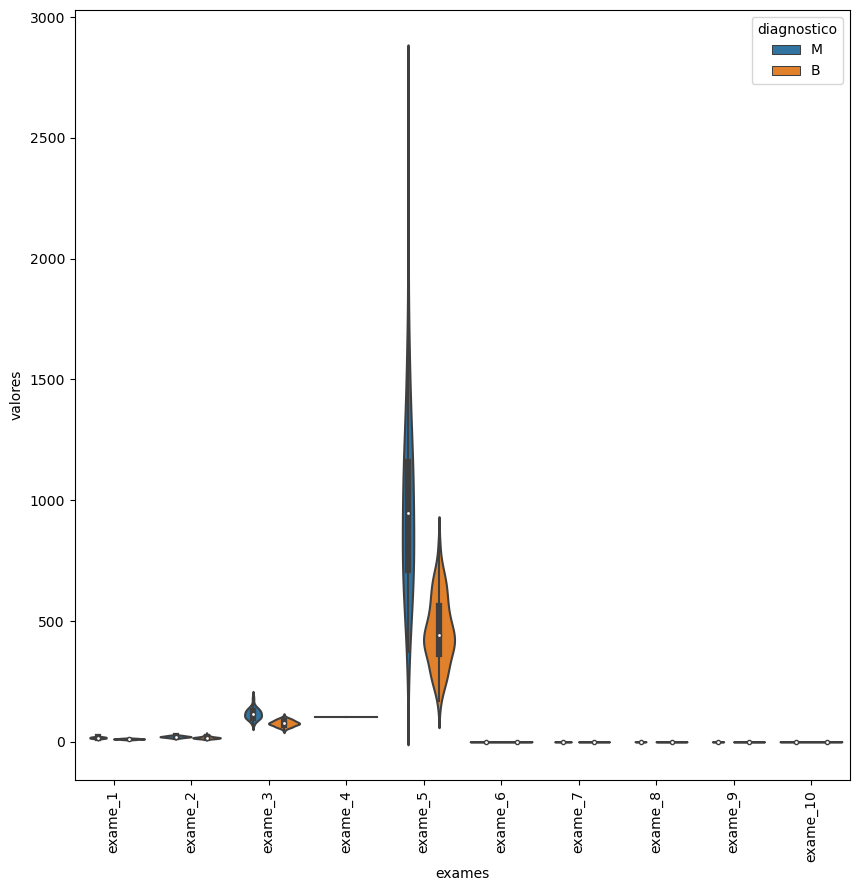

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt


dados_plot = pd.concat([diagnostico, valores_exames_v1.iloc[:,0:10]],axis = 1)
dados_plot = pd.melt(dados_plot, id_vars="diagnostico",
                    var_name="exames",
                    value_name='valores')
plt.figure(figsize=(10, 10))
sns.violinplot(x = "exames", y = "valores", hue = "diagnostico",
               data = dados_plot)
plt.xticks(rotation = 90)

In [26]:
from sklearn.preprocessing import StandardScaler

padronizador = StandardScaler()
padronizador.fit(valores_exames_v1)
valores_exames_v2 = padronizador.transform(valores_exames_v1)
valores_exames_v2

array([[ 1.8628415 , -1.0849184 ,  1.8829061 , ...,  0.9367497 ,
        -0.80882834, -0.33740223],
       [-0.35917949, -0.78629283, -0.27121192, ...,  1.11704968,
         2.19555007,  2.70903139],
       [ 0.60445206,  1.02522256,  0.59527416, ...,  0.15026874,
         0.01593933, -1.22727815],
       ...,
       [ 0.09429418,  1.72787096,  0.09006316, ...,  0.03991272,
        -1.02011713,  0.07394948],
       [-0.7134558 ,  2.21533328, -0.75919982, ..., -1.58900437,
        -2.28784991, -1.47165817],
       [ 2.22278623,  0.68268147,  2.16585707, ...,  1.85534702,
        -1.37226513, -0.69757487]])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'exame_1'),
  Text(1, 0, 'exame_2'),
  Text(2, 0, 'exame_3'),
  Text(3, 0, 'exame_4'),
  Text(4, 0, 'exame_5'),
  Text(5, 0, 'exame_6'),
  Text(6, 0, 'exame_7'),
  Text(7, 0, 'exame_8'),
  Text(8, 0, 'exame_9'),
  Text(9, 0, 'exame_10')])

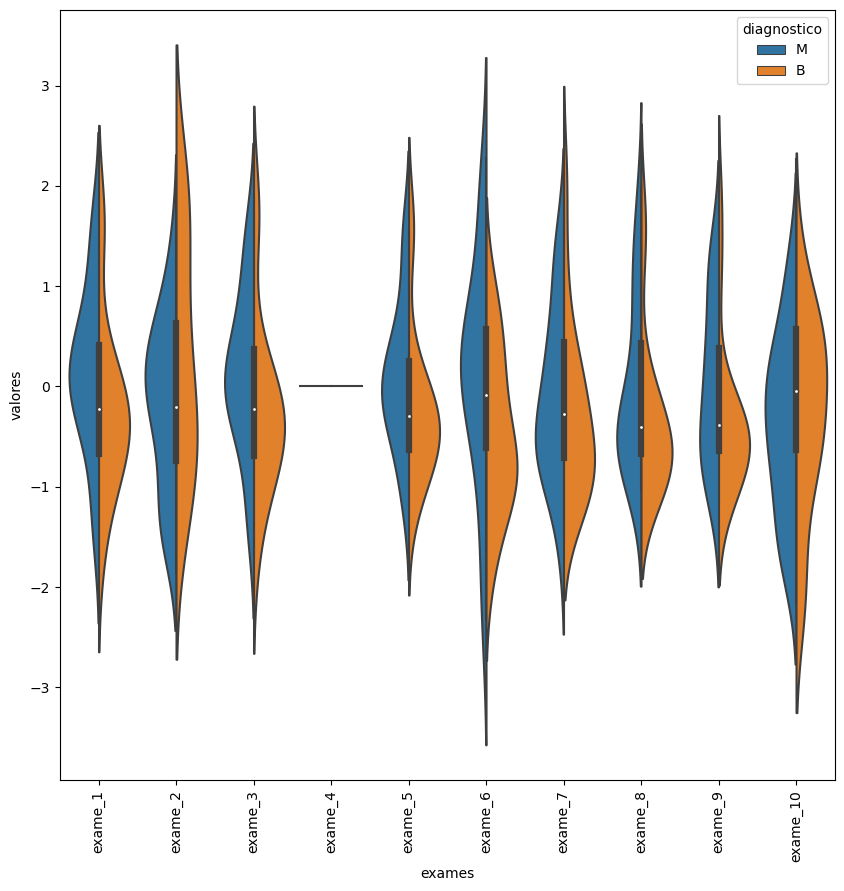

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

padronizador = StandardScaler()
padronizador.fit(valores_exames_v1)
valores_exames_v2 = padronizador.transform(valores_exames_v1)
valores_exames_v2 = pd.DataFrame(data = valores_exames_v2,
                                columns=valores_exames_v1.keys())

dados_plot = pd.concat([diagnostico, valores_exames_v2.iloc[:,0:10]],axis = 1)
dados_plot = pd.melt(dados_plot, id_vars="diagnostico",
                    var_name="exames",
                    value_name='valores')
plt.figure(figsize=(10, 10))
sns.violinplot(x = "exames", y = "valores", hue = "diagnostico",
               data = dados_plot, split= True)
plt.xticks(rotation = 90)

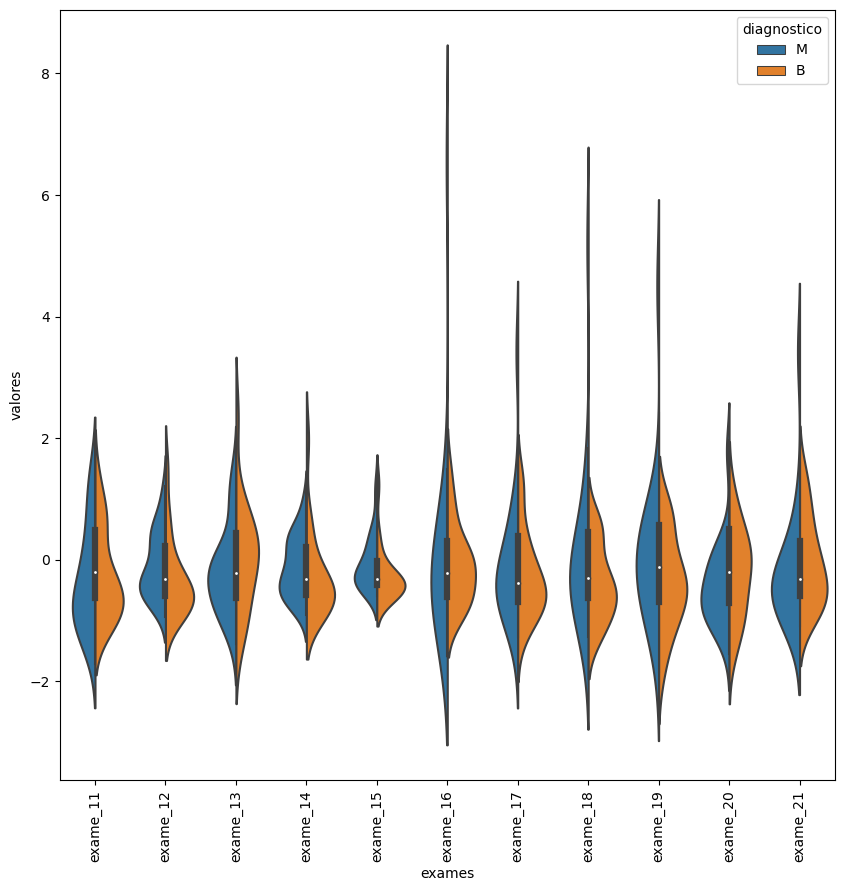

In [28]:
def grafico_violino(valores, inicio, fim):
    
    
    dados_plot = pd.concat([diagnostico, valores.iloc[:,inicio:fim]],axis = 1)
    dados_plot = pd.melt(dados_plot, id_vars="diagnostico",
                         var_name="exames",
                         value_name='valores')
    plt.figure(figsize=(10, 10))
    sns.violinplot(x = "exames", y = "valores", hue = "diagnostico",
                   data = dados_plot, split= True)
    plt.xticks(rotation = 90)

grafico_violino(valores_exames_v2, 10, 21)

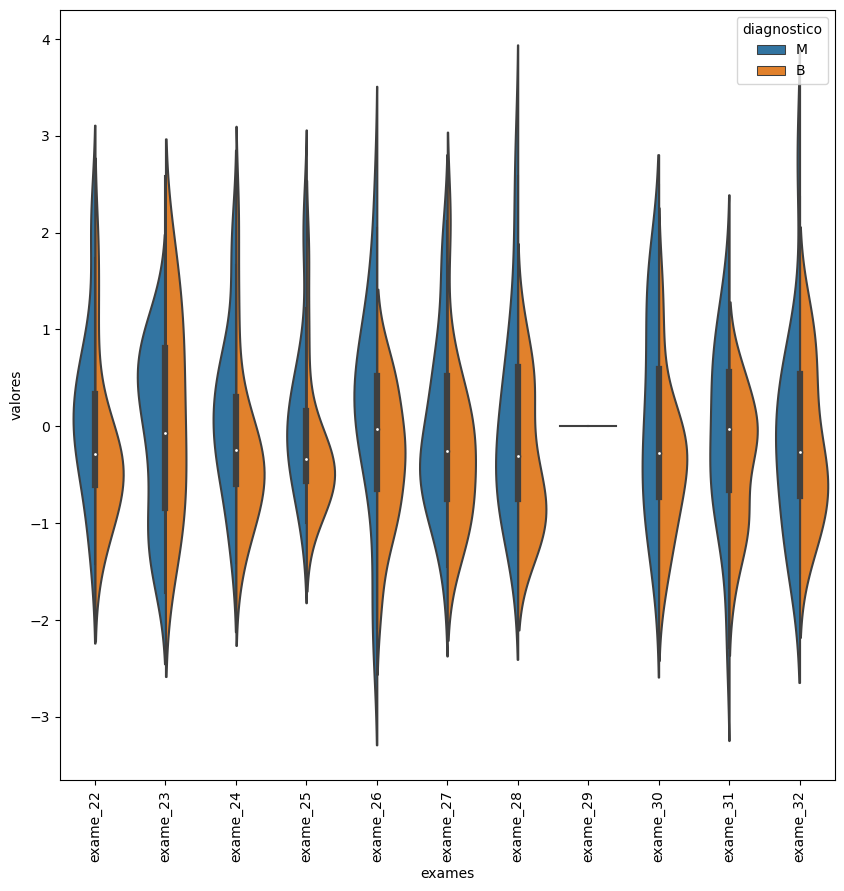

In [29]:
grafico_violino(valores_exames_v2, 21, 32)

In [30]:
valores_exames_v3 = valores_exames_v2.drop(columns=["exame_29", "exame_4"])

def classificar(valores):
    SEED = 0
    random.seed(SEED)
    treino_x, teste_x, treino_y, teste_y = train_test_split(valores, 
                                                        diagnostico,
                                                        test_size = 0.3)

    classificador = RandomForestClassifier(n_estimators = 100)
    classificador.fit(treino_x, treino_y)
    print("Resultado da classificação %.2f%%" %(classificador.score(teste_x,teste_y)*100))

classificar(valores_exames_v3)

Resultado da classificação 93.33%


<AxesSubplot:>

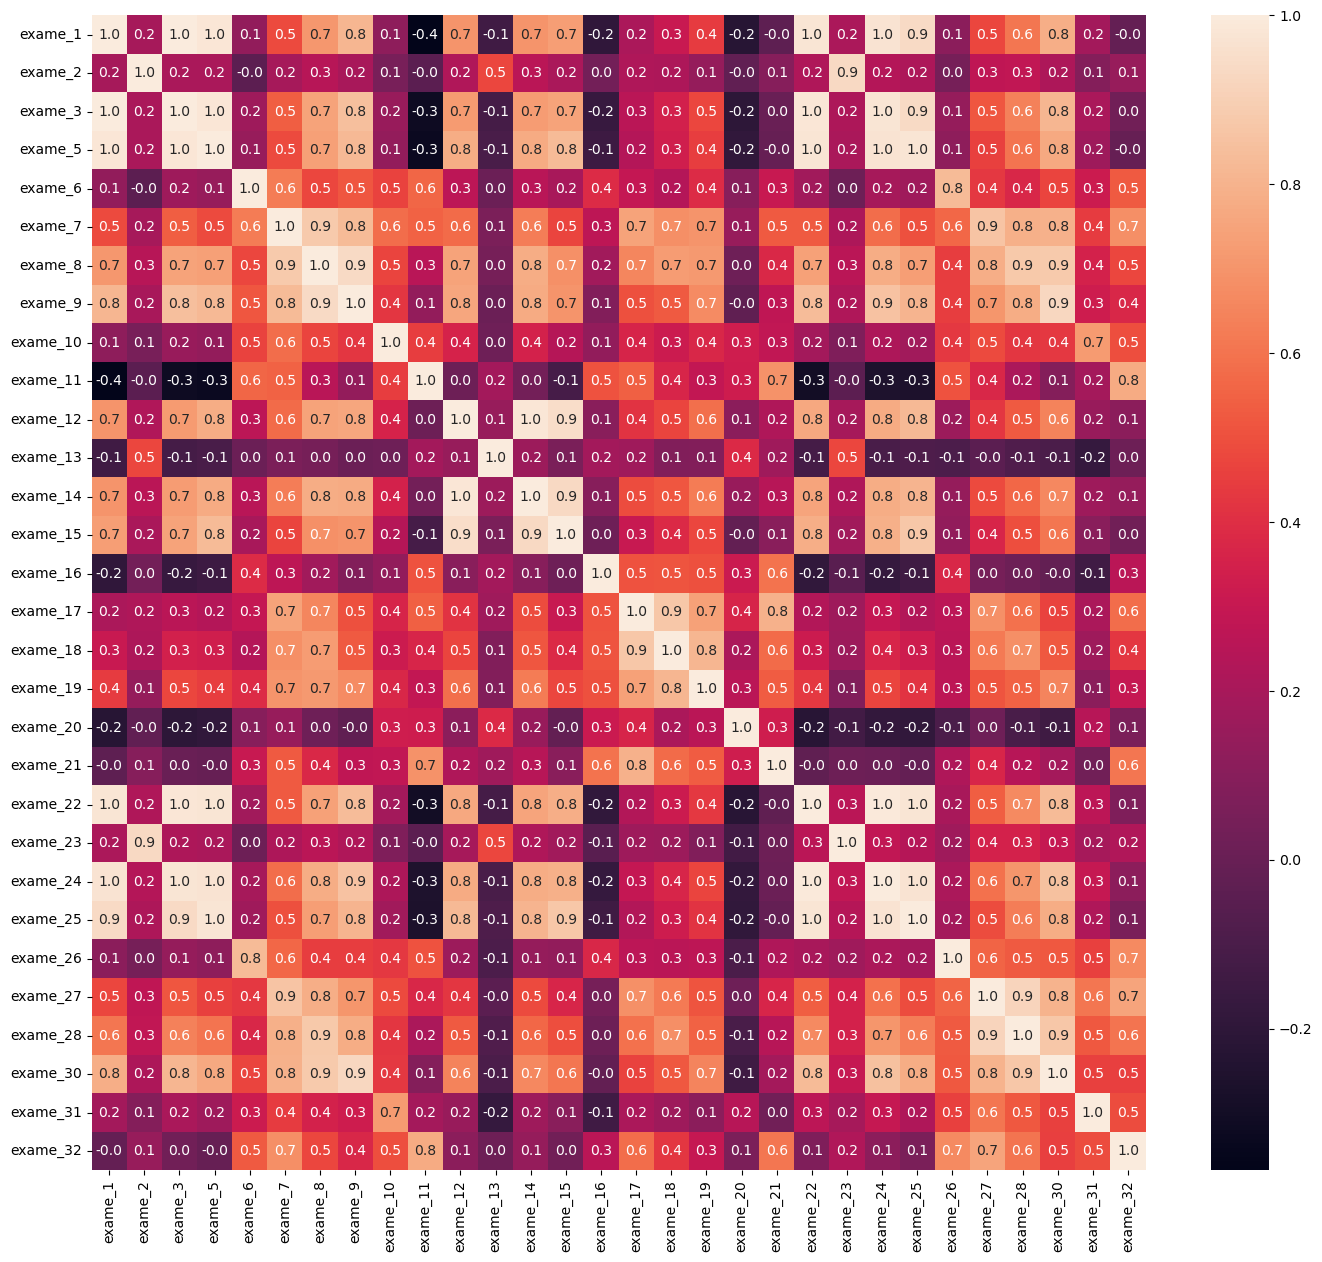

In [31]:
matriz_correlacao = valores_exames_v3.corr()
plt.figure(figsize = (17, 15))
sns.heatmap(matriz_correlacao, annot = True, fmt = ".1f")

In [32]:
matriz_correlacao_v1 = matriz_correlacao[matriz_correlacao>0.99]
matriz_correlacao_v1

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,NaN,0.997823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_3,0.997823,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_8,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
matriz_correlacao_v2 = matriz_correlacao_v1.sum()

In [34]:
matriz_correlacao_v2

exame_1     1.997823
exame_2     1.000000
exame_3     1.997823
exame_5     1.000000
exame_6     1.000000
exame_7     1.000000
exame_8     1.000000
exame_9     1.000000
exame_10    1.000000
exame_11    1.000000
exame_12    1.000000
exame_13    1.000000
exame_14    1.000000
exame_15    1.000000
exame_16    1.000000
exame_17    1.000000
exame_18    1.000000
exame_19    1.000000
exame_20    1.000000
exame_21    1.000000
exame_22    1.994413
exame_23    1.000000
exame_24    1.994413
exame_25    1.000000
exame_26    1.000000
exame_27    1.000000
exame_28    1.000000
exame_30    1.000000
exame_31    1.000000
exame_32    1.000000
dtype: float64

In [35]:
variaveis_correlacionadas = matriz_correlacao_v2[matriz_correlacao_v2>1]
variaveis_correlacionadas

exame_1     1.997823
exame_3     1.997823
exame_22    1.994413
exame_24    1.994413
dtype: float64

In [36]:
valores_exames_v4 = valores_exames_v3.drop(columns=variaveis_correlacionadas.keys())

In [37]:
valores_exames_v4

,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,...,exame_20,exame_21,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,-1.084918,1.893723,0.338619,0.632629,1.653741,1.593604,0.078538,-0.587481,1.209503,-0.698982,...,-0.436299,0.525946,-1.324681,1.217746,0.280969,-0.195030,0.921127,0.936750,-0.808828,-0.337402
1,-0.786293,-0.403416,2.277788,1.346813,1.105511,0.980317,1.111997,1.767744,-0.207697,-0.520514,...,0.131544,0.513146,-0.223028,-0.146171,2.039484,2.064866,1.664486,1.117050,2.195550,2.709031
2,1.025223,0.452793,-0.810074,0.006758,0.308805,0.266430,0.219802,-1.329445,0.022971,-0.212743,...,1.264454,-0.293664,0.385371,0.074602,-0.743777,-0.284041,0.000568,0.150269,0.015939,-1.227278
3,1.813506,0.105659,1.297626,1.145229,1.188700,0.790383,1.914973,1.038033,-0.088675,-0.286490,...,-0.296073,0.662095,1.858910,0.183762,1.562956,3.003016,2.581204,1.071975,2.627395,3.329578
4,0.186436,0.177663,0.223679,-0.534640,-0.037999,0.238922,-0.750460,-0.534387,0.255650,0.052746,...,-0.916675,-0.649358,0.886405,0.502565,0.660504,-0.321483,0.325342,0.911881,0.423690,0.006777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,-0.593065,-0.841326,-0.474422,-0.368381,-0.452171,-0.500115,-0.441909,0.543844,-0.945634,-0.302879,...,0.287042,0.826560,-0.489105,-0.774940,0.647853,-0.056568,-0.295130,-0.293798,-0.202763,0.814766
146,1.082313,-0.727015,-0.957451,-0.649447,-0.835387,-0.925041,0.699357,0.018343,0.412894,1.163869,...,0.549443,-0.303361,0.975098,-0.532401,-0.435932,-0.489615,-0.933486,-1.081678,0.479292,-0.370669
147,1.727871,-0.057962,0.267399,0.244819,-0.437988,-0.011266,-0.932616,-0.195397,-0.107115,0.465730,...,0.013533,0.599257,1.242731,-0.203287,-0.279900,-0.043852,-0.545842,0.039913,-1.020117,0.073949
148,2.215333,-0.658653,-1.481380,-1.233849,-1.046496,-1.138814,-2.705854,-1.106175,-0.276093,4.405462,...,-0.112809,-0.770380,2.040963,-0.640414,-1.605323,-1.255112,-1.273292,-1.589004,-2.287850,-1.471658


In [38]:
classificar(valores_exames_v4)

Resultado da classificação 93.33%


In [39]:
valores_exames_v5 = valores_exames_v3.drop(columns=["exame_3", "exame_24"])
classificar(valores_exames_v5)

Resultado da classificação 93.33%


In [42]:
valores_exames_v6 = valores_exames_v1.drop(columns=(["exame_4", "exame_29", "exame_3", "exame_24"]))

In [43]:
SEED = 0
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, 
                                                        diagnostico,
                                                        test_size = 0.3)

selecionar_kmelhores.fit(treino_x,treino_y)
treino_kbest = selecionar_kmelhores.transform(treino_x)
teste_kbest = selecionar_kmelhores.transform(teste_x)

In [44]:
teste_kbest.shape

(45, 5)

In [45]:
classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_kbest, treino_y)
print("Resultado da classificação %.2f%%" %(classificador.score(teste_kbest,teste_y)*100))

Resultado da classificação 93.33%


In [46]:
5/33

0.15151515151515152

In [47]:
from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(teste_y,classificador.predict(teste_kbest))

[Text(0.5, 41.249999999999986, 'Predição'), Text(78.25, 0.5, 'Real')]

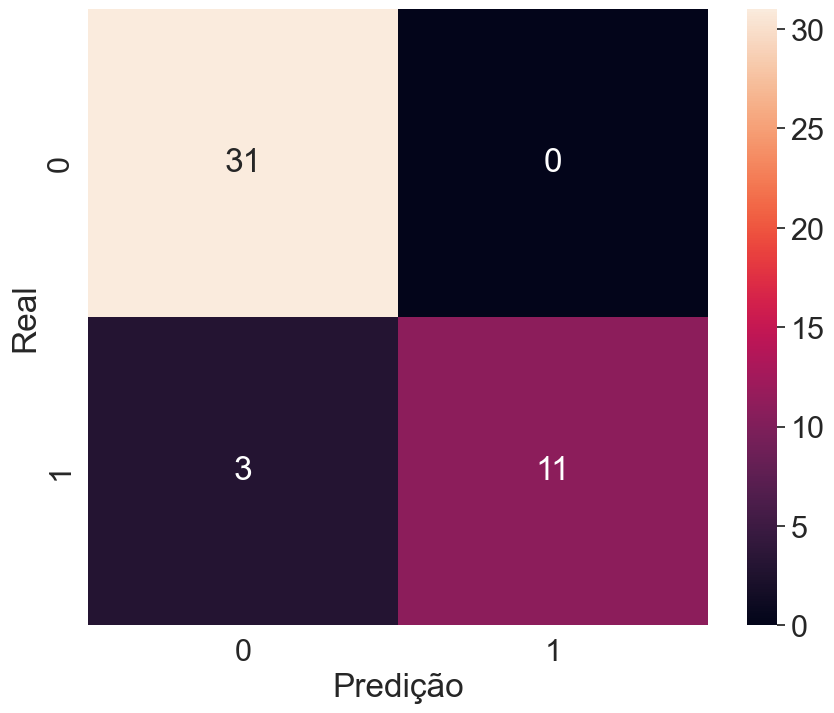

In [48]:
plt.figure(figsize = (10, 8))
sns.set(font_scale= 2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel= "Real")

Resultado da classificação 95.56%


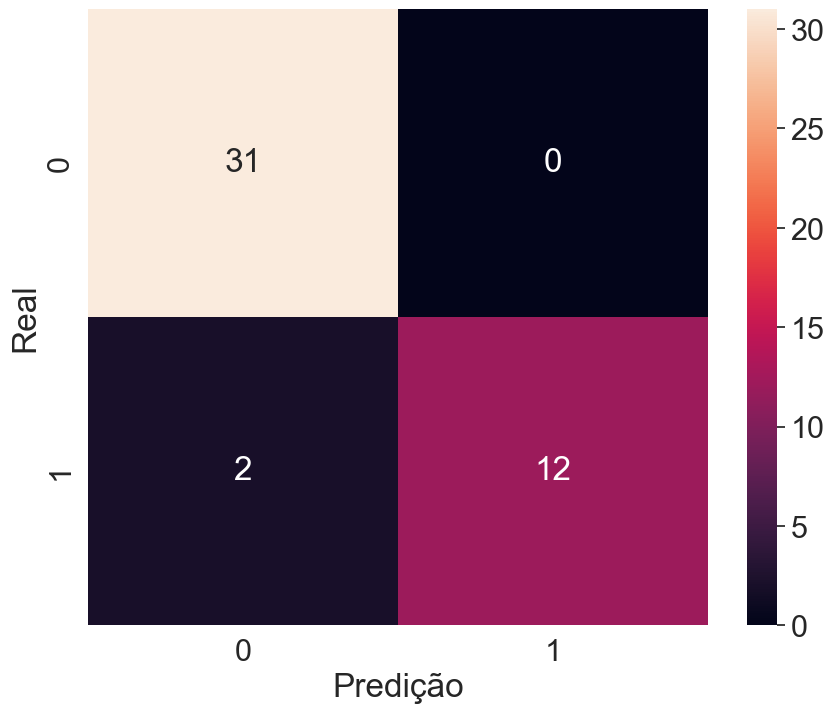

In [49]:
from sklearn.feature_selection import RFE

SEED= 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, 
                                                        diagnostico,
                                                        test_size = 0.3)

classificador = RandomForestClassifier(n_estimators = 100, random_state = 1234)
classificador.fit(treino_x, treino_y)
selecionador_rfe = RFE(estimator = classificador, n_features_to_select = 5, step = 1)
selecionador_rfe.fit(treino_x, treino_y)
treino_rfe = selecionador_rfe.transform(treino_x)
teste_rfe = selecionador_rfe.transform(teste_x)
classificador.fit(treino_rfe, treino_y)

matriz_confusao = confusion_matrix(teste_y,classificador.predict(teste_rfe))
plt.figure(figsize = (10, 8))
sns.set(font_scale= 2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "Real")

print("Resultado da classificação %.2f%%" %(classificador.score(teste_rfe,teste_y) * 100))

Resultado da classificação 91.11%


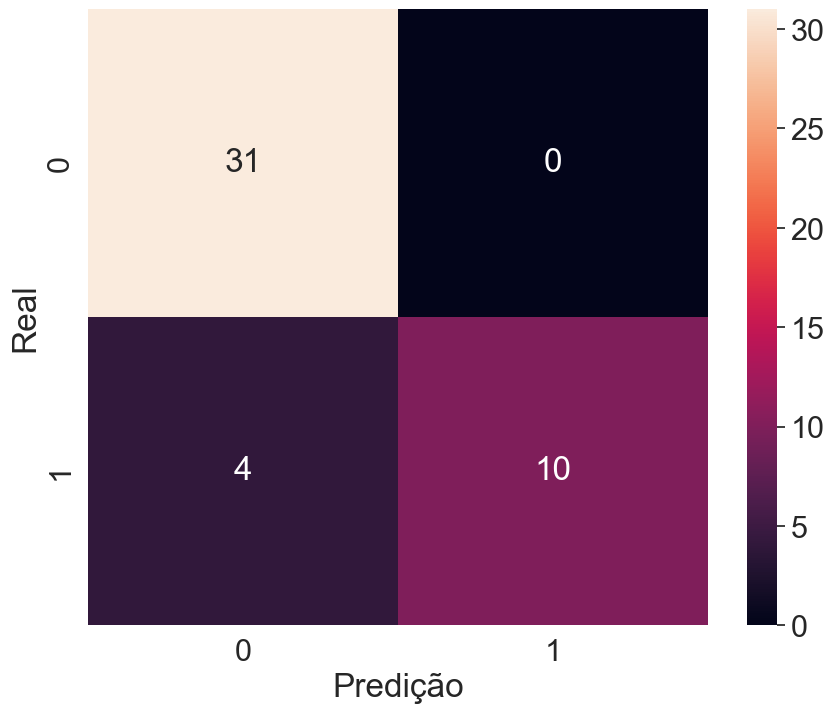

In [50]:
from sklearn.feature_selection import RFECV

SEED= 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, 
                                                        diagnostico,
                                                        test_size = 0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_x, treino_y)
selecionador_rfecv = RFECV(estimator = classificador, cv = 5, step = 1, scoring="accuracy")
selecionador_rfecv.fit(treino_x, treino_y)
treino_rfecv = selecionador_rfecv.transform(treino_x)
teste_rfecv = selecionador_rfecv.transform(teste_x)
classificador.fit(treino_rfecv, treino_y)

matriz_confusao = confusion_matrix(teste_y,classificador.predict(teste_rfecv))
plt.figure(figsize = (10, 8))
sns.set(font_scale= 2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel= "Real")

print("Resultado da classificação %.2f%%" %(classificador.score(teste_rfecv,teste_y)*100))

In [51]:
treino_x.columns[selecionador_rfecv.support_]

Index(['exame_1', 'exame_5', 'exame_7', 'exame_8', 'exame_9', 'exame_15',
       'exame_22', 'exame_25', 'exame_27', 'exame_28', 'exame_30'],
      dtype='object')

In [52]:
len(selecionador_rfecv.grid_scores_)

C:\Users\Micaeld\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


28

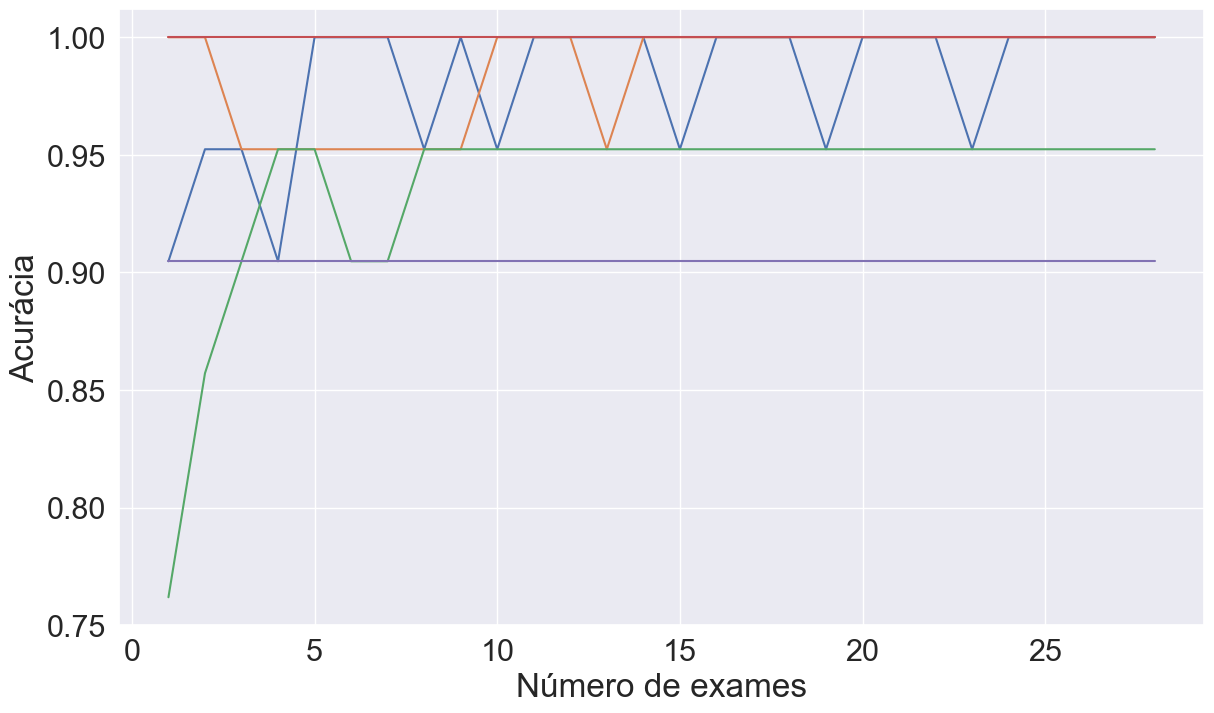

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize = (14, 8))
plt.xlabel("Número de exames")
plt.ylabel("Acurácia")
plt.plot(range(1, len(selecionador_rfecv.grid_scores_) +1), selecionador_rfecv.grid_scores_)
plt.show()

In [54]:
valores_exames_v7 = selecionador_rfe.transform(valores_exames_v6)

In [55]:
valores_exames_v7

array([[1.297e+03, 1.043e-01, 2.254e+01, 1.575e+03, 1.625e-01],
       [4.771e+02, 8.089e-02, 1.547e+01, 7.416e+02, 1.741e-01],
       [7.827e+02, 5.364e-02, 1.684e+01, 8.765e+02, 1.119e-01],
       [6.588e+02, 7.364e-02, 1.746e+01, 9.432e+02, 1.712e-01],
       [6.845e+02, 5.259e-02, 1.907e+01, 1.138e+03, 1.609e-01],
       [2.739e+02, 2.076e-02, 1.023e+01, 3.149e+02, 6.227e-02],
       [9.127e+02, 1.401e-01, 2.225e+01, 1.461e+03, 2.550e-01],
       [7.324e+02, 8.751e-02, 2.027e+01, 1.269e+03, 2.024e-01],
       [3.711e+02, 5.669e-02, 1.284e+01, 5.140e+02, 1.424e-01],
       [1.104e+03, 9.961e-02, 2.409e+01, 1.651e+03, 2.493e-01],
       [1.076e+03, 1.009e-01, 2.282e+01, 1.567e+03, 2.378e-01],
       [4.376e+02, 1.349e-02, 1.310e+01, 5.272e+02, 6.296e-02],
       [1.033e+03, 1.060e-01, 2.060e+01, 1.321e+03, 1.325e-01],
       [7.128e+02, 3.334e-02, 1.810e+01, 1.030e+03, 1.530e-01],
       [4.090e+02, 2.278e-02, 1.284e+01, 5.062e+02, 6.316e-02],
       [1.152e+03, 8.994e-02, 2.614e+01,

<AxesSubplot:>

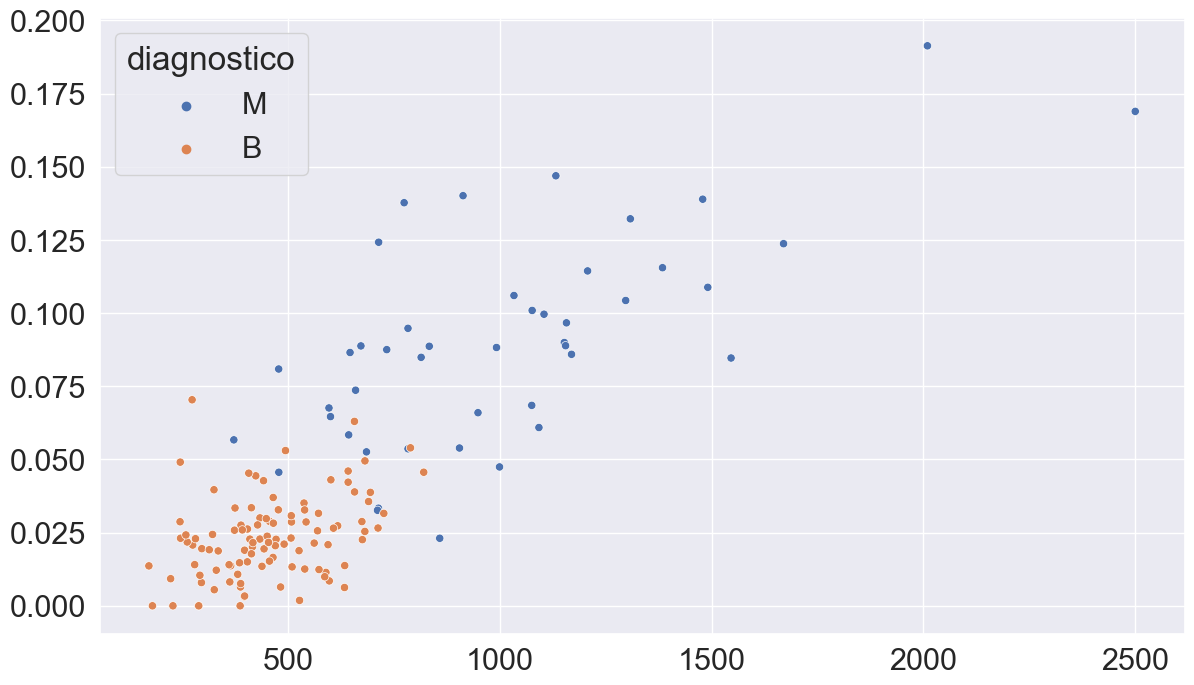

In [56]:
import seaborn as sns
plt.figure(figsize=(14,8))
sns.scatterplot(x = valores_exames_v7[:,0] , y = valores_exames_v7[:,1], hue = diagnostico)

<AxesSubplot:>

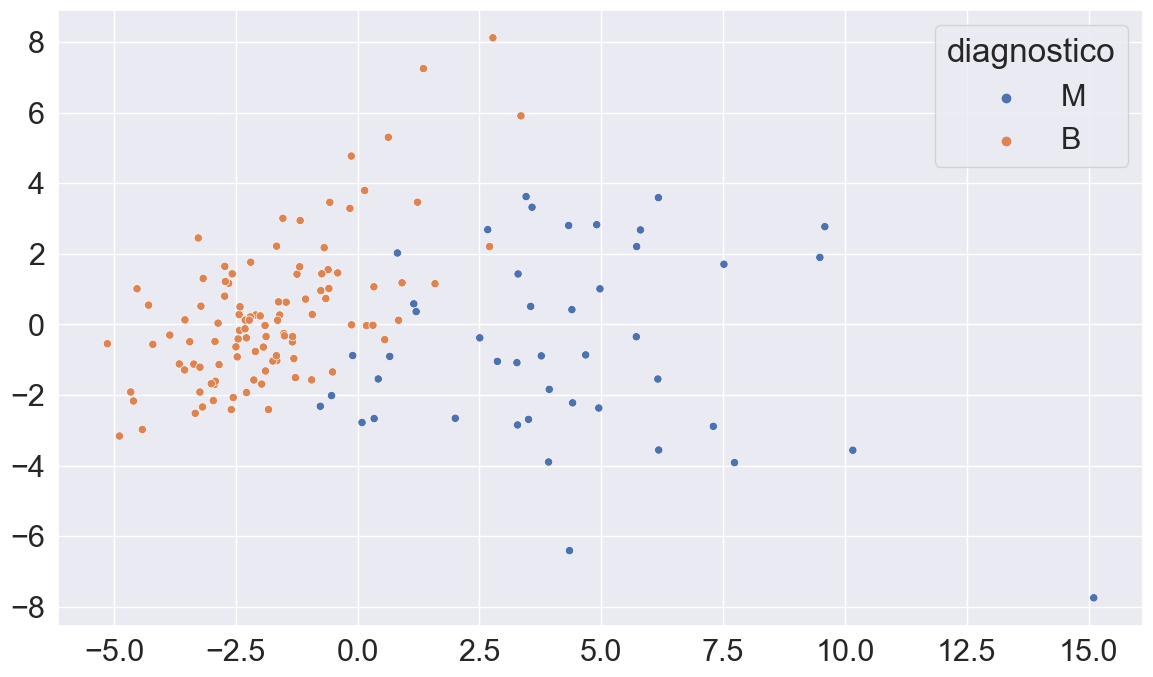

In [57]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
valores_exames_v8 = pca.fit_transform(valores_exames_v5)
plt.figure(figsize=(14,8))
sns.scatterplot(x = valores_exames_v8[:,0] , y = valores_exames_v8[:,1], hue = diagnostico)

C:\Users\Micaeld\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Micaeld\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<AxesSubplot:>

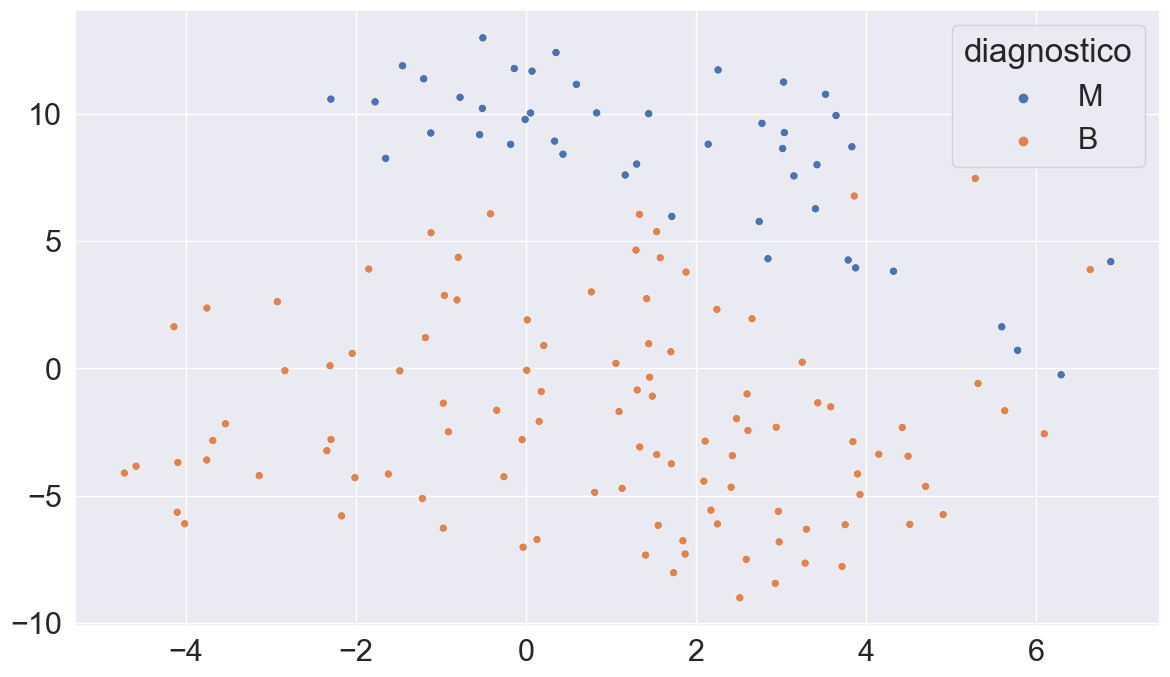

In [58]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2)
valores_exames_v9 = tsne.fit_transform(valores_exames_v5)
plt.figure(figsize=(14,8))
sns.scatterplot(x = valores_exames_v9[:,0] , y = valores_exames_v9[:,1], hue = diagnostico)

In [59]:
_

<AxesSubplot:>